# Tarefa 4 - Regras de associação

Neste exercício, você deve aplicar regras de associação para analisar um dataset utilizando o algoritmo Apriori. A ideia é identificar padrões frequentes de co-ocorrência entre os itens e extrair regras que possam ser úteis para insights de negócios.

---

## **Dicas:**

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet

- Documentação do pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX

- Documentação do MLextend: https://rasbt.github.io/mlxtend/

- Documentação do matplotlib: https://matplotlib.org/stable/index.html

- Documentação do seaborn: https://seaborn.pydata.org/tutorial.html

## **Dataset:**

O conjunto de dados `dataset.csv` contém 29.338 linhas com os pedidos de compra de pessoas em supermercados. Esses pedidos podem ser analisados, e regras de associação podem ser geradas utilizando a Análise de Cesta de Compras por meio de algoritmos como o Algoritmo Apriori.

**Colunas:**

1. **transaction_id** → Id da transação
2. **product** → Nome do produto

## **Importe os pacotes**

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
warnings.filterwarnings("ignore")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## **Crie os datasets**
### **Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD**

**Dicas:**

* Certifique-se que os arquivos a serem lidos estão carregados na sua sessão do Colab, ou em um drive previamente montado, e ajuste o comando para incluir todo o caminho até cada um dos arquivos a serem lidos.
* Se clicar com o botão direito do mouse no arquivo que deseja ser carregado que está ali nas esquerda (após upload) você pode clicar na opção de `copy path` que vai já pegar o caminho necessário para inserir no comando. Para inserir só pressionar `Ctrl + V`

In [ ]:
df=pd.read_csv('/content/dataset.csv')
df.head()


,transaction_id,product
0,1,burgers
1,1,eggs
2,1,meatballs
3,2,chutney
4,3,avocado


# **Transforme as bases de dados**

Para aplicar o algoritmo Apriori, primeiro precisamos transformar o dataset para um formato adequado. No caso de transações com múltiplos itens, vamos converter os dados em um formato de lista de itens por transação. Em seguida, devemos transformar essas listas em uma matriz booleana.

**Dica:**
- Primeiramente agrupe os dados de modo que cada transação contenha uma lista de itens, isso pode ser feito utilizando a função `groupby()['product']` e o método `.apply(list)`. O resultado disso será um DataFrame com a coluna `'transaction_id'` sendo o id da transação e  `'produtos'` como a lista de todos os produtos comprados naquela transação/compra.

Ex:

     transaction_id   |     produtos
     1                |   [burgers, eggs, meatballs]
- Após agrupar use a `TransactionEncoder()` para transformar as listas de itens em um formato de matriz binária. Ou seja, o resultado disso será um DataFrame em que as linhas continuam como registros de transações mas os itens comprados tornam-se colunas e seus valores variam de True ou False caso a transação tenha incluiu o item ou não.

Link de apoio: https://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

Ex:

      burgers     |     eggs    |    salty snack   |    salty snack   |.....
      True        |     True    |         True     |    False         |.....

In [ ]:
transactions = df.groupby('transaction_id')['product'].apply(list).reset_index(name='products')
display(transactions.head())

,transaction_id,products
0,1,"[burgers, eggs, meatballs]"
1,2,[chutney]
2,3,"[avocado, turkey]"
3,4,"[energy bar, green tea, milk, mineral water, w..."
4,5,[low fat yogurt]


In [ ]:
transaction_encoder = TransactionEncoder()
te_matriz = transaction_encoder.fit(transactions['products']).transform(transactions['products'])
df_encoded = pd.DataFrame(te_matriz, columns=transaction_encoder.columns_)
display(df_encoded.head())

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **Encontre os itemsets mais frequentes**

Agora com a base de dados transformada para o formato adequado, utilize o algoritmo apriori para encontrar as combinações de produtos mais frequentes de serem compradas.


Para começar, você pode definir um suporte mínimo de 2% (se quiser, varie esse valor para visualizar os efeitos)

**Dica:**

- Busque pela função `apriori()` da biblioteca `mlxtend`

Link de apoio: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [ ]:
from mlxtend.frequent_patterns import apriori

apriori(df_encoded,min_support=0.02, use_colnames=True)

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.033733,(brownies)
3,0.087200,(burgers)
4,0.030133,(butter)
...,...,...
99,0.020133,"(whole wheat rice, mineral water)"
100,0.022933,"(olive oil, spaghetti)"
101,0.025200,"(spaghetti, pancakes)"
102,0.021200,"(shrimp, spaghetti)"


#**Gere e visualize as regras de associação**

Para gerar e visualizar as regras de associação, comece definindo uma confiança mínima de 35%. Se desejar, você pode ajustar esse valor para observar como ele afeta os resultados. Após a geração das regras, organize-as em ordem decrescente de confiança para facilitar a visualização.

**Dica:**

- Busque pela função `association_rules()` da biblioteca `mlxtend`

Link de apoio: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [ ]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules
frequent_itemsets = fpgrowth(df_encoded, min_support=0.02,use_colnames=True)
maior_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.35)
maior_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
9,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,1.0,0.011805,1.308483,0.460018,0.099325,0.235756,0.266563
7,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175
8,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,1.0,0.022088,1.373959,0.624888,0.168096,0.272176,0.312015
3,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,1.0,0.007966,1.257517,0.416947,0.074789,0.204782,0.239378
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
2,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,1.0,0.013019,1.218433,0.402718,0.119964,0.179273,0.262399
0,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
5,(tomatoes),(mineral water),0.068400,0.238267,0.024400,0.356725,1.497168,1.0,0.008103,1.184149,0.356454,0.086443,0.155512,0.229566
6,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,1.0,0.011082,1.180687,0.363034,0.112595,0.153035,0.248208


### **Descreva a regra gerada com o maior valor de confiança**

A regra com o maior valor de confianca é (soup) - antecedents / (mineral water) - consequents
Isso significa que, quando "soup" é comprado, há uma alta probabilidade de que "mineral water" também seja comprado na mesma transação.

In [ ]:
maior_conf.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
1,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
2,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,1.0,0.013019,1.218433,0.402718,0.119964,0.179273,0.262399
3,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,1.0,0.007966,1.257517,0.416947,0.074789,0.204782,0.239378
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846


### **Qual o suporte e a confiança desta regra?**

O suporte é de 0.023067 e a confianca é 0.456464

# **Filtrar Regras Relevantes**

A partir do DataFrame gerado com as regras de associação, selecione as regras com valores de confiança superiores a 35%.

In [ ]:
relevant_rules = maior_conf[maior_conf['confidence'] > 0.35]
display(relevant_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
1,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
2,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,1.0,0.013019,1.218433,0.402718,0.119964,0.179273,0.262399
3,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,1.0,0.007966,1.257517,0.416947,0.074789,0.204782,0.239378
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
5,(tomatoes),(mineral water),0.068400,0.238267,0.024400,0.356725,1.497168,1.0,0.008103,1.184149,0.356454,0.086443,0.155512,0.229566
6,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,1.0,0.011082,1.180687,0.363034,0.112595,0.153035,0.248208
7,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175
8,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,1.0,0.022088,1.373959,0.624888,0.168096,0.272176,0.312015
9,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,1.0,0.011805,1.308483,0.460018,0.099325,0.235756,0.266563


# **Analise as regras de associação**

Plote  um gráfico para analisar as regras de associação.

Para analisar as regras de associação, considere a **confiança**, o **suporte** e a **elevação (lift)**.

**Dica:**

- Uma abordagem eficaz é utilizar um gráfico de dispersão (`plt.scatter()`)
- Escolha duas dessas variáveis para representar os eixos x e y, e use a terceira variável para determinar a escala de cor dos pontos


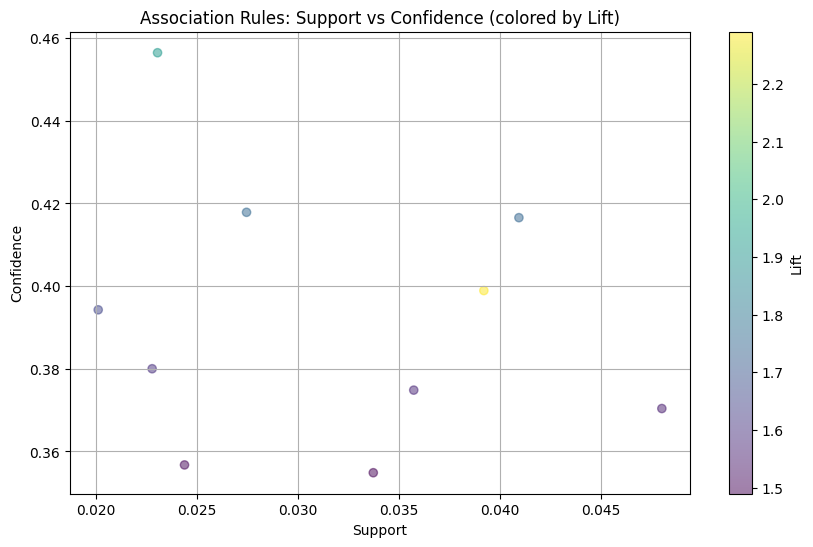

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(relevant_rules['support'], relevant_rules['confidence'], alpha=0.5, c=relevant_rules['lift'], cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Regra de Associacao: Support vs Confidence (colored by Lift)')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

# **Cenário**

Imagine o seguinte cenário: o gerente de um supermercado deseja aumentar as vendas de água mineral (mineral water), que, apesar de ser popular, não é o produto mais comprado. O plano é criar uma promoção que incentive os clientes a adicionar água mineral ao carrinho junto com outros itens que costumam ser comprados junto com ela. Seu objetivo é identificar os itens frequentemente associados à água mineral para criar uma promoção eficaz.

**Dica:**
- Explore a relação entre os antecedentes (itens comprados antes) e os consequentes (itens que tendem a ser comprados depois)
- Altere a confiança mínima no algoritmo de regras de associação para encontrar as combinações mais fortes relacionadas à água mineral.


In [ ]:
mineral_water_rules = relevant_rules[relevant_rules['consequents'].astype(str).str.contains('mineral water')]
display(mineral_water_rules.sort_values(by='confidence', ascending=False))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
9,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,1.0,0.011805,1.308483,0.460018,0.099325,0.235756,0.266563
7,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175
3,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,1.0,0.007966,1.257517,0.416947,0.074789,0.204782,0.239378
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
2,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,1.0,0.013019,1.218433,0.402718,0.119964,0.179273,0.262399
0,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
5,(tomatoes),(mineral water),0.068400,0.238267,0.024400,0.356725,1.497168,1.0,0.008103,1.184149,0.356454,0.086443,0.155512,0.229566
6,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,1.0,0.011082,1.180687,0.363034,0.112595,0.153035,0.248208
